<h1 style="text-align:center">Build and Evaluate Unsupervised Learning Models</h1>
<h2 style="text-align:center">Wine Clustering</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">February 23, 2025</p>

## Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for preprocessing, PCA, and clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# SciPy for hierarchical clustering
import scipy.cluster.hierarchy as sch


## Load The Data

In [2]:
df = pd.read_csv('wine-clustering.csv')

## Prepare the Data

In [5]:
# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

## Perform PCA

In [6]:
pca_full = PCA()
pca_full.fit(data_scaled)

PCA()

In [7]:
# Calculate cumulative explained variance for each component.
cum_variance = np.cumsum(pca_full.explained_variance_ratio_)

In [8]:
# Determine the minimum number of components needed to explain at least 80% of the variance.
n_components = np.argmax(cum_variance >= 0.80) + 1
print(f"Number of components explaining at least 80% variance: {n_components}")

Number of components explaining at least 80% variance: 5


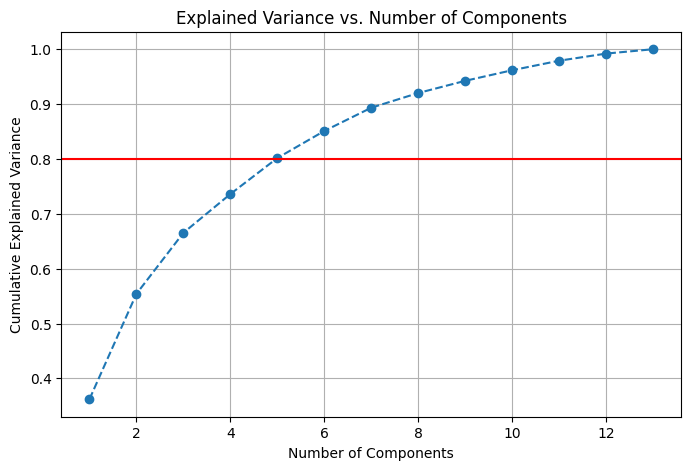

In [9]:
# Plot the cumulative explained variance.
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [10]:
# Run PCA again using the selected number of components.
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

## K-Means Clustering

In [11]:
# Evaluate different values for k (here we consider k from 2 to 10).
k_range = range(2, 11)
inertia_values = []
silhouette_scores = []

In [12]:
print("K-Means Clustering Evaluation:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    clusters = kmeans.fit_predict(data_pca)
    
    # Compute the within-cluster sum of squares (inertia) and silhouette score.
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
    silhouette_avg = silhouette_score(data_pca, clusters)
    silhouette_scores.append(silhouette_avg)
    
    print(f"  k = {k}: Inertia = {inertia:.2f}, Silhouette Score = {silhouette_avg:.3f}")


K-Means Clustering Evaluation:
  k = 2: Inertia = 1201.16, Silhouette Score = 0.324
  k = 3: Inertia = 825.02, Silhouette Score = 0.369
  k = 4: Inertia = 723.94, Silhouette Score = 0.326
  k = 5: Inertia = 663.99, Silhouette Score = 0.265
  k = 6: Inertia = 605.38, Silhouette Score = 0.273
  k = 7: Inertia = 558.11, Silhouette Score = 0.276
  k = 8: Inertia = 524.52, Silhouette Score = 0.226
  k = 9: Inertia = 474.11, Silhouette Score = 0.224
  k = 10: Inertia = 451.06, Silhouette Score = 0.212


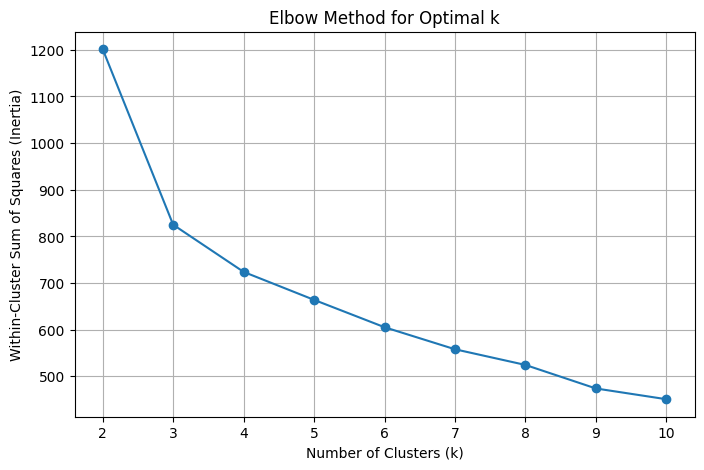

In [13]:
# Plot the elbow curve (inertia vs. k)
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

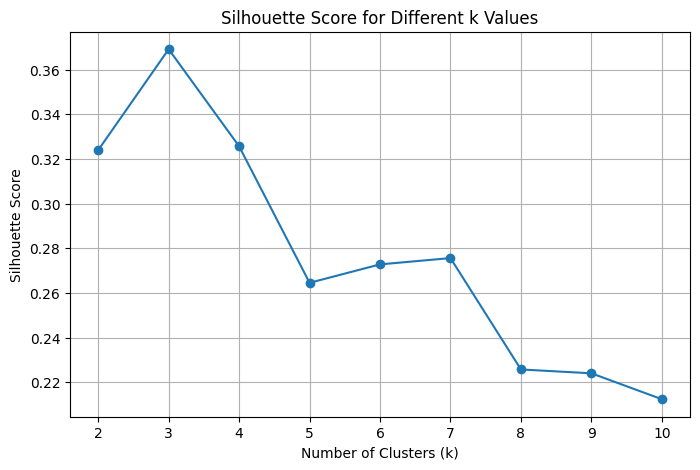

In [14]:
# Plot the silhouette scores vs. k
plt.figure(figsize=(8, 5))
plt.plot(list(k_range), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()

In [15]:
# Choose the best k based on the silhouette score (or other criteria).
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Best k according to silhouette score: {best_k}")

Best k according to silhouette score: 3


In [16]:
# Fit the final k-means model with the selected best_k.
kmeans_final = KMeans(n_clusters=best_k, init='k-means++', n_init=10, random_state=42)
clusters_final = kmeans_final.fit_predict(data_pca)

## Hierarchical Clustering

In [17]:
# Compute the linkage matrix using Ward's method.
linkage_matrix = sch.linkage(data_pca, method='ward')

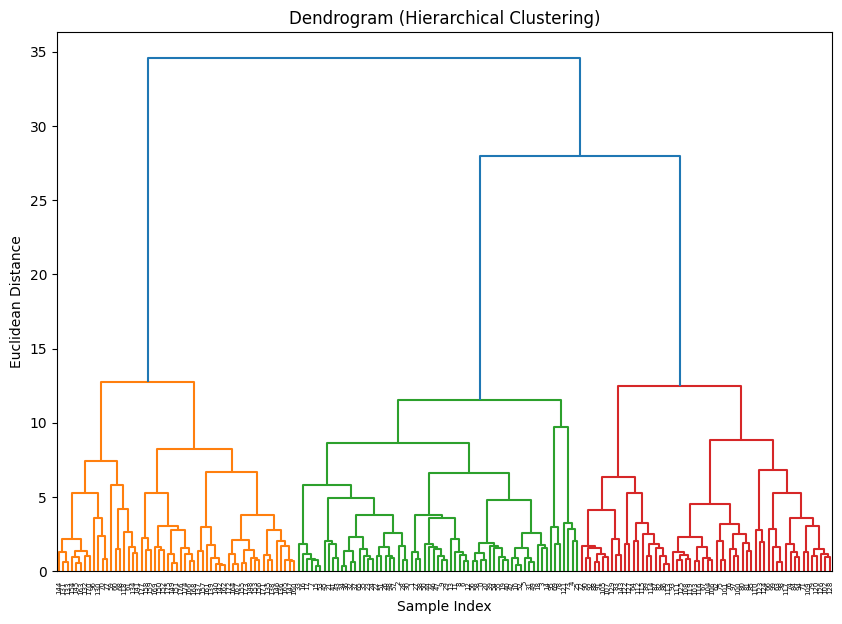

In [18]:
# Plot the dendrogram.
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()